# Digital vs Analog Comparison
It is thought that Ortec Digibases are losing 20% of counts compared to the analog setup. Below is an analysis comparing the counts from a Digibase and an analog setup using a 16*4*2 NaI bar. The sources used for the analysis were Cs137, Co60, and Co57

In [1]:
# jupyter specific magic operator
%pylab inline
import matplotlib.patches as mpatches
# import numpy as np
# from numpy import *
# import matplotlib.pyplot as plt
from becquerel import Spectrum
import os
from copy import deepcopy
import numpy as np
from gamma_energies import gamma_energies
from calibration import spectrum_calibration
from calibration import data_clean
from lmfit.models import GaussianModel
from lmfit.models import LinearModel
import operator

Populating the interactive namespace from numpy and matplotlib


# File names
The following two cells are creating arrays of all the files. 
How to interpret the file name: digibase_5min_0_1.Spe This is from the digibase at a 0 zero angle from the detector so straight on in x and the 1 refers to the first run. 30 means a 30 degree offset and so forth.

In [2]:
fname1 = ['Data_collection/digibase_5min_0_1.Spe', 'Data_collection/digibase_5min_30_1.Spe', \
         'Data_collection/digibase_5min_60_1.Spe', \
         'Data_collection/digibase_5min_90_1.Spe','Data_collection/digibase_5min_30_2.Spe',  \
         'Data_collection/digibase_5min_60_2.Spe', \
         'Data_collection/digibase_5min_90_2.Spe', 'Data_collection/digibase_5min_0_2.Spe']

In [3]:
fname2 = ['Data_collection/analog_vs_digital/analog_5min_0_1.Spe', \
         'Data_collection/analog_vs_digital/analog_5min_60_1.Spe', \
         'Data_collection/analog_vs_digital/analog_5min_30_1.Spe', \
         'Data_collection/analog_vs_digital/analog_5min_90_1.Spe', \
          'Data_collection/analog_vs_digital/analog_5min_0_2.Spe', \
          'Data_collection/analog_vs_digital/analog_5min_30_2.Spe', \
        'Data_collection/analog_vs_digital/analog_5min_60_2.Spe', \
         'Data_collection/analog_vs_digital/analog_5min_90_2.Spe']

# Fix Spe file
Since the data was not calibrated in gamma vision, the below function adds 1's to MCA_Cal so Bq runs. It writes the 1's to a new filename while preserving the original data. 

In [4]:
def fix_spe_zero_cal(fname, fname_new=None):
    if fname_new is None:
        fname_new = '{}_fixed{}'.format(*os.path.splitext(fname))
    with open(fname, 'r') as infile:
        old_lines = [l.rstrip('\n') for l in infile]
    new_lines = deepcopy(old_lines)
    for i, l in enumerate(old_lines):
        if l.startswith('$MCA_CAL'):
            cal = [float(x) for x in old_lines[i + 2].split()]
            if np.isclose(sum(cal), 0.):
                new_lines[i + 2] = '1.0 1.0 1.0'
                print('Fixed line:', i + 2)

    with open(fname_new, 'w') as infile:
        infile.write('\n'.join(new_lines) + '\n')

    return fname_new

# Background Subtraction

Background was run for 30 minutes
Measurements lasted for 5 minutes
The data is normalized to time

In [5]:
fname = 'Data_collection/digibase_5min_0_1.Spe'
digital_0_1 = Spectrum.from_file(fix_spe_zero_cal(fname))
#Background Subtraction
fname = 'Data_collection/digibase_30min_bg.Spe'
spec_bg = Spectrum.from_file(fix_spe_zero_cal(fname))
#spec_bg = spec_bg.counts_vals*time_1/time_2
fname = 'Data_collection/analog_vs_digital/analog_5min_0_1.Spe'
spec_1_analog = Spectrum.from_file((fname))
fname = 'Data_collection/analog_vs_digital/analog_30min_bg.Spe'
analog_bg = Spectrum.from_file((fname))

Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_0_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_30min_bg_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_0_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_30min_bg.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0


# Measurement Information

In [6]:
print(digital_0_1.start_time)
print(digital_0_1.stop_time)
print(digital_0_1.realtime)
print(digital_0_1.livetime)

print(spec_1_analog.start_time)
print(spec_1_analog.stop_time)
print(spec_1_analog.realtime)
print(spec_1_analog.livetime)

from IPython.display import HTML, display

data = [["Analog Real Time","Analog Live Time","Analog Total Counts", "Digital Real Time","Digital Live Time","Digital Total Counts"]]
for i, j in zip(fname1, fname2):
    input_data = []
    digital_data = Spectrum.from_file(fix_spe_zero_cal(i))
    spec_1_analog = Spectrum.from_file((j))
    input_data.append(spec_1_analog.realtime); input_data.append(spec_1_analog.livetime)
    input_data.append(sum(spec_1_analog.counts))
    input_data.append(digital_data.realtime); input_data.append(digital_data.livetime)
    input_data.append(sum(digital_data.counts))
    data.append(input_data)
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

2018-02-09 09:57:31
2018-02-09 10:02:33
302.0
299.0
2018-02-09 11:15:58
2018-02-09 11:20:58
300.0
292.0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_0_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_0_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_30_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_60_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_60_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_30_1.Spe
Unknown line:  $PRES

Analog Real Time,Analog Live Time,Analog Total Counts,Digital Real Time,Digital Live Time,Digital Total Counts
300.0,292.0,(6.330+/-0.008)e+05,302.0,299.0,(8.884+/-0.009)e+05
300.0,292.0,(6.763+/-0.008)e+05,300.0,296.0,(8.923+/-0.009)e+05
300.0,292.0,(6.607+/-0.008)e+05,300.0,296.0,(9.247+/-0.010)e+05
300.0,292.0,(6.646+/-0.008)e+05,300.0,296.0,(9.154+/-0.010)e+05
300.0,292.0,(6.306+/-0.008)e+05,301.0,297.0,(9.102+/-0.010)e+05
300.0,292.0,(6.591+/-0.008)e+05,300.0,296.0,(9.324+/-0.010)e+05
300.0,292.0,(6.771+/-0.008)e+05,300.0,296.0,(9.174+/-0.010)e+05
300.0,292.0,(6.648+/-0.008)e+05,300.0,296.0,(8.746+/-0.009)e+05


# Plotting Source, Bg, and Source - Bg

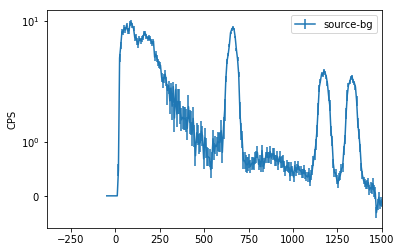

In [7]:
digital_1 = digital_0_1 - spec_bg #normalized to the live time

data_2_calibrate = digital_0_1.cps_vals
channel_width = 20; clean_right = 90

data_digital = data_clean(data_2_calibrate, clean_right)
energy_list = gamma_energies('Cs137', 'Co60')
slope_d, intercept_d = spectrum_calibration(channel_width, energy_list, digital_1.cps_vals, clean_right)

calibrated_channel_digital = []
for i in range(0,len(digital_0_1.counts_vals)):
    calibrated_channel_digital += [i*slope_d+ intercept_d]
calibrated_channel_digital = np.array(calibrated_channel_digital, 'float')


#plt.errorbar(calibrated_channel_digital, digital_0_1.cps_vals, yerr=digital_0_1.cps_uncs, label='source')
#plt.errorbar(spec_bg.channels, spec_bg.cps_vals, yerr=spec_bg.cps_uncs, label='bg')
plt.errorbar(calibrated_channel_digital, digital_1.cps_vals, yerr=digital_1.cps_uncs, label='source-bg')
plt.yscale('symlog')
plt.xlim(right=1500)
plt.legend()
plt.ylabel('CPS')

# Fitting the Data with a Gauss function and a linear subtraction

The following cell calibrates the raw spectrum for both the analog and digital system. It requires some knowledge of the spectrum. Clean left and clean right remove the noise at the beginning of the spectrum. 
For the digital system, it will turn all of the peaks before channel 100 to 0. It will then rely on Cs137 and Co60 to calibrate the output
The analog system is similar. 

# Cs137 Digital Fit

The amplitude sum is 76.83


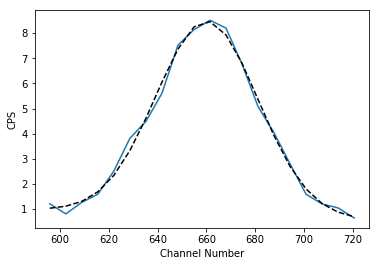

Gauss fit ampliture is 404.01


In [8]:
energy_spectrum = gamma_energies('Cs137')
energy_spectrum = sorted(energy_spectrum, key=int)
from gauss_peak_fit import spectrum_gauss_fit
sigma_digital_list =[]

channel_width = 10; clean_right = 90
gauss_fit_parameters = spectrum_gauss_fit(digital_1.cps_vals, clean_right, channel_width, energy_spectrum, calibrated_channel_digital)
sigma = gauss_fit_parameters.params['g1_sigma'].value
sigma_digital_list.append(sigma)
amplitude = gauss_fit_parameters.params['g1_amplitude'].value
print("Gauss fit ampliture is %0.2f" % amplitude)

# Co60 Fit

The amplitude sum is 36.79


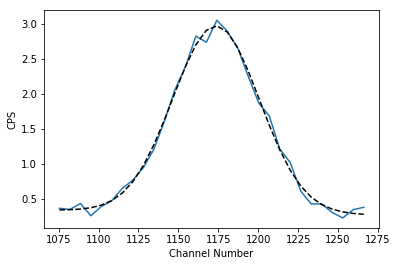

The amplitude sum is 30.02


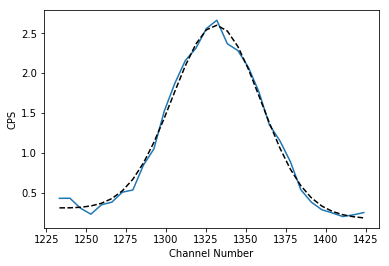

[20.917241551581288, 4.23346, 27.71917479838277]
Gauss fit ampliture is 164.39


In [9]:
energy_spectrum = gamma_energies('Co60')
from gauss_peak_fit import spectrum_gauss_fit

channel_width = 15; clean_right = 145
gauss_fit_parameters = spectrum_gauss_fit(digital_1.cps_vals, clean_right, channel_width, energy_spectrum, calibrated_channel_digital)

sigma = gauss_fit_parameters.params['g1_sigma'].value
sigma_digital_list.append(4.233460)
sigma_digital_list.append(sigma)
print(sigma_digital_list)
amplitude = gauss_fit_parameters.params['g1_amplitude'].value
print("Gauss fit ampliture is %0.2f" % amplitude)

# Plotting Resolution as a function of energy for Digital

0
100000


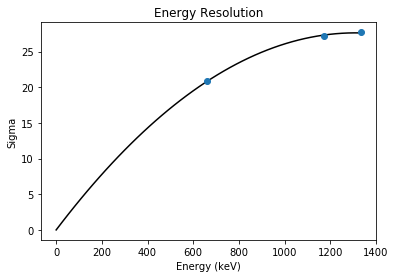

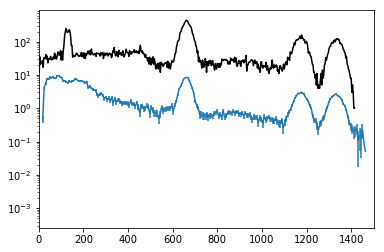

In [10]:
Energy = gamma_energies('Cs137', 'Co60')
sigma_digital_list = [20.917241551581288, 27.186005907076137, 27.71917479838277]
Energy = [661.657, 1173.228, 1332.492]
from lmfit.models import QuadraticModel

model = QuadraticModel(prefix='q1_')
pars = model.guess(sigma_digital_list, x=Energy)
pars.update(model.make_params())
pars['q1_c'].set(0, 0)
#pars['q1_'].set(x[np.argmax(real_y)], min=x[np.argmax(real_y)]\
#- 3)
out  = model.fit(sigma_digital_list, pars, x=Energy)
q1_a = out.params['q1_a'].value
q1_b = out.params['q1_b'].value
q1_c = out.params['q1_c'].value

x_new = np.linspace(0, Energy[-1], 50)
y_new = q1_a*(x_new)**2 + q1_b*(x_new) + q1_c
plt.title("Energy Resolution")
plt.xlabel("Energy (keV)")
plt.ylabel("Sigma")
plt.plot(x_new, y_new, 'k')
plt.plot(Energy, sigma_digital_list, 'o')

def fast_blur(center, sigma):
    return np.random.normal(center, sigma)

from sim_reader import cosima_output
fname = ['NaI_Tl_detector.inc5.id1.sim']
for i in fname:
    plt.figure(2)
    nrg = cosima_output(i)
    nrgsb_fast = fast_blur(nrg, q1_a*(nrg)**2 + q1_b*(nrg) + q1_c)
    cnts, bin_edges = np.histogram(nrgsb_fast, bins=np.arange(0, 3001, 3))
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2.
    plt.semilogy(bin_centers, cnts, 'k', zorder = 10)
    #plt.semilogy(calibrated_channel_digital, digital_1.cps_vals, 'b', zorder = 0)
    plt.errorbar(calibrated_channel_digital, digital_1.cps_vals, yerr=digital_1.cps_uncs, label='source-bg')
    plt.xlim(0,1500,100)

# Analog System

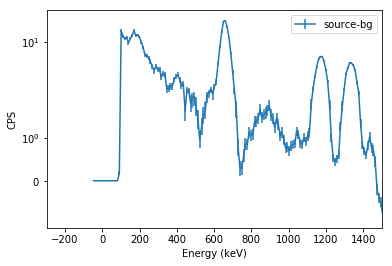

In [11]:
analog_1 = spec_1_analog - analog_bg #normalized to the live time
data_2_calibrate = spec_1_analog.cps_vals
channel_width = 15; clean_left = 0; clean_right = 60

data_analog = data_clean(data_2_calibrate, clean_right)

energy_list = gamma_energies('Cs137', 'Co60')

slope_a, intercept_a = spectrum_calibration(channel_width, energy_list, analog_1.cps_vals, clean_right)

calibrated_spec1_analog = []
for i in range(0,len(spec_1_analog.cps_vals)):
    calibrated_spec1_analog += [i*slope_a+ intercept_a]
calibrated_spec1_analog = np.array(calibrated_spec1_analog, 'float')

#plt.errorbar(calibrated_spec1_analog, spec_1_analog.cps_vals, yerr=spec_1_analog.cps_uncs, label='source')
#plt.errorbar(analog_bg.channels, analog_bg.cps_vals, yerr=analog_bg.cps_uncs, label='bg')
plt.errorbar(calibrated_spec1_analog, analog_1.cps_vals, yerr=analog_1.cps_uncs, label='source-bg')
plt.yscale('symlog')
plt.xlim(right=1500)
plt.legend()
plt.ylabel('CPS')
plt.xlabel('Energy (keV)')

The amplitude sum is 122.09


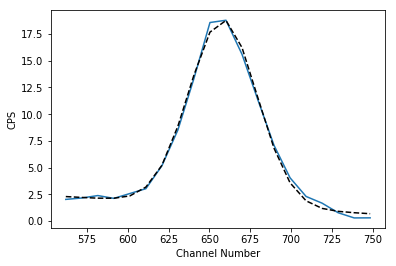

The amplitude sum is 53.21


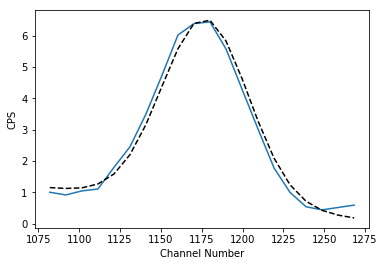

The amplitude sum is 42.27


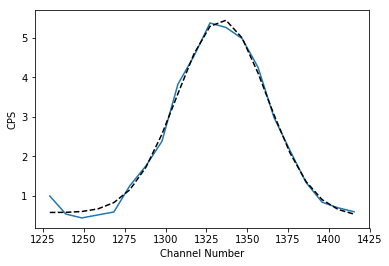

27.592914646519908 342.0501722619359


In [12]:
channel_width = 10; clean_right = 60
energy_spectrum = gamma_energies('Cs137', 'Co60')

gauss_fit_parameters = spectrum_gauss_fit(analog_1.cps_vals ,clean_right, channel_width, energy_spectrum, calibrated_spec1_analog)
sigma = gauss_fit_parameters.params['g1_sigma'].value
amplitude = gauss_fit_parameters.params['g1_amplitude'].value
print(sigma, amplitude)

# Plotting the different degrees of NaI bar orientation

0
100000
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_0_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_0_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_30_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_60_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
0
Fixed line: 1046
SpeFile: Reading file Data_collection/digibase_5min_60_1_fixed.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
SpeFile: Reading file Data_collection/analog_vs_digital/analog_5min_30_1.Spe
Unknown line:  $PRESETS:
Unknown line:  None
Unknown line:  0
Unknown line:  0
0
100000
Fixed line: 1046
SpeFil

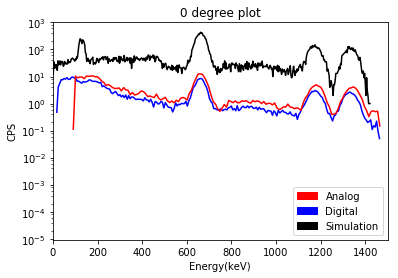

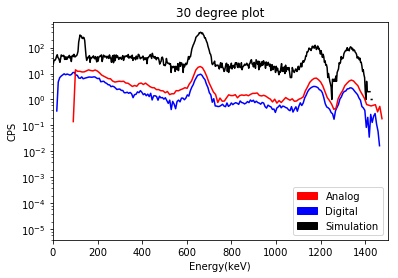

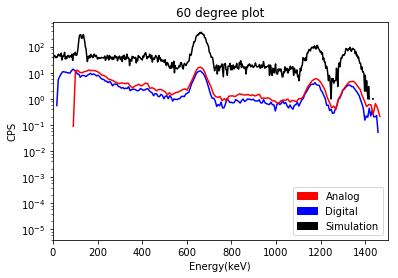

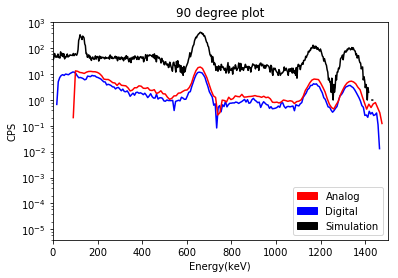

In [14]:
figure_counter=0; count_list = []; bin_centers_list = []
from sim_reader import cosima_output
fname = ['NaI_Tl_detector.inc5.id1.sim', 'NaI_Tl_detector.inc6.id1.sim', \
         'NaI_Tl_detector.inc7.id1.sim', 'NaI_Tl_detector.inc8.id1.sim']
angles = ['0', '30', '60', '90']
for i in arange(len(fname)):
    plt.figure(i)
    nrg = cosima_output(fname[i])
    nrgsb_fast = fast_blur(nrg, q1_a*(nrg)**2 + q1_b*(nrg) + q1_c)
    cnts, bin_edges = np.histogram(nrgsb_fast, bins=np.arange(0, 3001, 3))
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2.
    plt.semilogy(bin_centers, cnts, 'k', zorder = 10)

    spec_2 = Spectrum.from_file(fix_spe_zero_cal(fname1[i]))
    bgsub2 = spec_2 - spec_bg
    plt.semilogy(calibrated_channel_digital, bgsub2.cps_vals, 'b', zorder = 0)

    spec_2 = Spectrum.from_file(fname2[i])
    bgsub2 = spec_2 - analog_bg
    plt.semilogy(calibrated_spec1_analog, bgsub2.cps_vals, 'r', zorder = 10)
        
    plt.ylabel("CPS")
    plt.xlabel("Energy(keV)")
    plt.title("%s degree plot" % angles[i])
    plt.xlim(0,1500, 50)
    red_patch = mpatches.Patch(color='Red', label='Analog')
    red_patch1 = mpatches.Patch(color='Blue', label='Digital')
    red_patch2 = mpatches.Patch(color='Black', label='Simulation')
    plt.legend(handles=[red_patch, red_patch1, red_patch2],loc="lower right")

In [ ]:
def slow_blur(center, sigma):
    blur = np.zeros_like(center)
    for i, e in enumerate(center):
        blur[i] = e + np.random.normal(0, sigma)
    return blur

def fast_blur(center, sigma):
    return np.random.normal(center, sigma)

In [ ]:
center = 662
sigma = 10

nrgs = np.ones(int(1e6)) * center
print(nrgs.shape)
print(nrgs.mean())

nrgsb_slow = slow_blur(nrgs, (sigma))
nrgsb_fast = fast_blur(nrgs, sigma)

be = np.linspace(center - sigma*5, center + sigma*5, 100)
print(len(be))
bc = be[:-1] + np.diff(be) / 2.
cnts, _ = np.histogram(nrgsb_slow, bins=be)
plot(bc, cnts, label='slow')
cnts, _ = np.histogram(nrgsb_fast, bins=be)
plot(bc, cnts, label='fast')
legend()

In [ ]:
%timeit slow_blur(nrgs, sigma)

In [ ]:
%timeit fast_blur(nrgs, sigma)